In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import xarray as xr
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import cmoocean as cmo
import warnings
from wim_dateTime import createListDateTime
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import ListedColormap
import os
import glob
from matplotlib.gridspec import GridSpec

cmap=cmo.matter()
#        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
# bounds = [0, 10, 30, 60, 100, 200, 300, 400, 600, 900, 1200, 1500, 2000]
bounds=[0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400] #, 4500, 4800, 5100, 5400, 5700, 6000] # 1000, 2000, 6000, 10000]
norm= mpl.colors.BoundaryNorm(bounds, cmap.N)

bounds_obs = [x for x in bounds]
norm_obs = mpl.colors.BoundaryNorm(bounds_obs, cmap.N)

/tmp/ipykernel_1479074/4081201961.py:53: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc_obs = m.pcolor(x, y, fsd.where(maskMIZ>0), cmap=cmap, norm=norm_obs)
/tmp/ipykernel_1479074/4081201961.py:62: UserWarning: No contour levels were found within the data range.
  cont2=m.contour(x,y, wave_frac.where(aice>0.5).values, colors='tab:green', levels=[0], linewidths=3)


NameError: name 'hs' is not defined

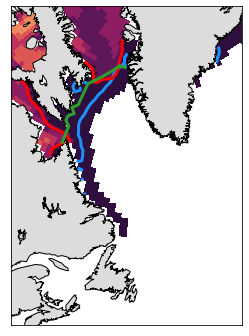

In [ ]:
fig = plt.figure(figsize=[9, 10])
fig.subplots_adjust(left=0.08, right=0.87, bottom=0.03, top=0.96) 
gs = GridSpec(2,3,figure=fig, hspace=0.1, wspace=0.1, width_ratios=[1, 1, 0.06])

m = Basemap(width=2250000,height=3100000, resolution='l',projection='stere',\
        lat_ts=50,lat_0=58.5,lon_0=-54.)
# m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
# m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
#         lat_ts=50,lat_0=58,lon_0=-55.)

list_cases=['case83', 'case89', 'case95', 'case96'] #, 'case97', 'case98']

mm=3
year=2018
index=0
for case in list_cases:
    if index == 0:
        col=0
        row=0
    elif index == 1:
        col=1
        row=0
    elif index == 2:
        col=0
        row=1
    elif index == 3:
        col=1
        row=1
    elif index == 4:
        col=0
        row=2
    elif index == 5:
        col=1
        row=2
        
    rep='/aos/home/bward/wim/cice/out/'+case+'/history/'
    nameFile='iceh_avg.'+str(year)+'-'+str(mm).zfill(2)+'.nc'
    
    pathFile=rep+nameFile
    dx= xr.open_dataset(pathFile)
    lat=dx.TLAT
    lon=dx.TLON
    x,y = m(lon.values, lat.values)
    aice=np.squeeze(dx.aice)
    fsd=np.squeeze(dx.fsdrad).where(aice>0.15)
#     hs=np.squeeze(dx.hs).where(aice>0.15)
    wave_frac=np.squeeze(dx.dafsd_wave[:,0,:,:])
    
    maskMIZ=aice.where(np.logical_or(np.logical_or(lat<=45, lat>=51), np.logical_or(lon<=360-75, lon>=360-57)))
    
    ax1 = fig.add_subplot(gs[col, row])
    plt.sca(ax1)
    sc_obs = m.pcolor(x, y, fsd.where(maskMIZ>0), cmap=cmap, norm=norm_obs)
#, norm=norm, cmap=cmap)
    m.fillcontinents(color='gainsboro')
    m.drawcoastlines()
    cont2=m.contour(x,y, aice.where(maskMIZ>0).values, colors='dodgerblue', levels=[0.8], linewidths=3)
# cont=m.pcolor(x,y, maskMIZ, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=2)
#     test=m.pcolor(x,y, maskFSD, color='tab:green')
#     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
    cont2=m.contour(x,y, fsd.where(maskMIZ>0).values, colors='r', levels=[300], linewidths=3)
    cont2=m.contour(x,y, wave_frac.where(aice>0.5).values, colors='tab:green', levels=[0], linewidths=3)
    cont2=m.contour(x,y, hs.where(aice>0.5).values, colors='tab:orange', levels=[0.1], linewidths=3)

    
    if index == 0:
        ax1.set_title('a) IC4-M3 (CTRL)', loc='left', fontsize=20)
        m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,0], size=20)
        m.drawgreatcircle(-53, 60, -73, 76, linewidth=3, color='dimgrey', linestyle='--')
        m.drawgreatcircle(-53.5, 59.8, -52.4, 60, linewidth=3, color='dimgrey')
#         m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
#         m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

    elif index == 1:
        ax1.set_title('b) IC2-IS2', loc='left', fontsize=20)
        m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
        m.drawgreatcircle(-53, 60, -73, 76, linewidth=3, color='dimgrey', linestyle='--')
        m.drawgreatcircle(-53.5, 59.8, -52.4, 60, linewidth=3, color='dimgrey')

#         m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
#         m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

    elif index == 2:
        ax1.set_title('c) IC4-M8', loc='left', fontsize=20)
        m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,0], size=20)
        m.drawgreatcircle(-53, 60, -73, 76, linewidth=3, color='dimgrey', linestyle='--')
        m.drawgreatcircle(-53.5, 59.8, -52.4, 60, linewidth=3, color='dimgrey')

#         m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
#         m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

    elif index == 3:
        ax1.set_title('d) IC5-IS2', loc='left', fontsize=20)
        m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
        m.drawgreatcircle(-53, 60, -73, 76, linewidth=3, color='dimgrey', linestyle='--')
        m.drawgreatcircle(-53.5, 59.8, -52.4, 60, linewidth=3, color='dimgrey')
        
    elif index == 4:
        ax1.set_title('e) IC4-M3 (NEWI) ', loc='left', fontsize=20)
        m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,0], size=20)
        m.drawgreatcircle(-53, 60, -73, 76, linewidth=3, color='dimgrey', linestyle='--')
        m.drawgreatcircle(-53.5, 59.8, -52.4, 60, linewidth=3, color='dimgrey')
        
    elif index == 5:
        ax1.set_title('f) IC4-M3 (FRAC) ', loc='left', fontsize=20)
        m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,0], size=20)
        m.drawgreatcircle(-53, 60, -73, 76, linewidth=3, color='dimgrey', linestyle='--')
        m.drawgreatcircle(-53.5, 59.8, -52.4, 60, linewidth=3, color='dimgrey')
#         m.plot(-53, 60, "r_", markersize=12, latlon=True)

#         m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
#         m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')


        
    index = index + 1

cax = fig.add_subplot(gs[:,2], aspect=35)
cbar = fig.colorbar(sc_obs, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=18)
cbar.ax.tick_params(labelsize=18)
#     cb.set_label('Mean floe diameter model [m]', size=20)
#     cb=plt.colorbar(sc_obs, ax=axes[2], shrink=0.35)
cbar.ax.tick_params(labelsize=18)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Mean floe diameter [m]', size=20)
    
# ax2 = fig.add_subplot(gs[0, 1])
# plt.sca(ax2)
# sc_obs = m.pcolor(x, y, cMIZndMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax2.set_title('nFSD-MIZ', loc='center', fontsize=24)
# ax2.set_title('b)', loc='left', fontsize=24)

# ax3 = fig.add_subplot(gs[1, 0])
# plt.sca(ax3)
# sc_obs = m.pcolor(x, y, ncMIZndMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,1,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax3.set_ylabel("nSIC-MIZ", size=24)
# ax3.set_title('c)', loc='left', fontsize=24)

# ax4 = fig.add_subplot(gs[1, 1])
# plt.sca(ax4)
# sc_obs = m.pcolor(x, y, ncMIZdMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax4.set_title('d)', loc='left', fontsize=24)

# cax = fig.add_subplot(gs[:, 2], aspect=25)
# cbar = fig.colorbar(sc_obs, cax=cax, orientation='vertical')
# cbar.ax.tick_params(labelsize=20)
# cbar.ax.tick_params(labelsize=20)
# cbar.set_label('Frequency of occurence [%]', size=24)
plt.savefig('labrador_sensitivity_IC4_IC2_IC5_NEWI.png',dpi='figure',format='png',metadata=None, bbbox_inches=None)

/tmp/ipykernel_1562258/3608606602.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc_obs = m.pcolor(x, y, fsdrad.where(maskMIZ>0),  cmap=cmap, norm=norm_obs)
/tmp/ipykernel_1562258/3608606602.py:47: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cont2=m.contour(x,y, aice.where(maskMIZ>0).values, colors='dodgerblue', linestyle='--', levels=[0.8], linewidths=2)
/tmp/ipykernel_1562258/3608606602.py:74: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('fracture_packIce.png',dpi='figure',format='png',metadata=None, bbbox_inches=None)


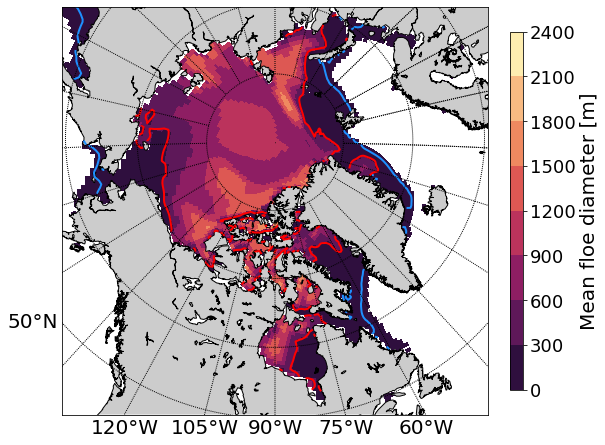

In [19]:
fig = plt.figure(figsize=[8, 6.5])
fig.subplots_adjust(left=0.1, right=0.90, bottom=0.02, top=0.98) 
gs = GridSpec(1,2,figure=fig, hspace=0.1, wspace=0.1, width_ratios=[1, 0.03])

# m = Basemap(width=7000000, height=6700000, resolution='l', projection='stere', lat_ts=50, lat_0=80, lon_0=-90.)

m = Basemap(width=7000000, height=6700000, resolution='l', projection='stere', lat_ts=50, lat_0=80, lon_0=-90.)
# m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
# m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
#         lat_ts=50,lat_0=58,lon_0=-55.)

list_cases=['case11']

mm=1
year=2018
index=0

for case in list_cases:
    if index == 0:
        col=0
        row=0
    elif index == 1:
        col=0
        row=1

    rep='/aos/home/bward/wim/cice/out/'+case+'/history/'
    nameFile='iceh_avg.'+str(year)+'-'+str(mm).zfill(2)+'.nc'
    
    pathFile=rep+nameFile
    dx= xr.open_dataset(pathFile)
    lat=dx.TLAT
    lon=dx.TLON
    
    x,y = m(lon.values, lat.values)
    aice=np.squeeze(dx.aice)
    fsdrad=np.squeeze(dx.fsdrad)    
    maskMIZ=aice.where(np.logical_and(aice>0.15, lat>0))
    
    ax1 = fig.add_subplot(gs[col, row])
    plt.sca(ax1)
    sc_obs = m.pcolor(x, y, fsdrad.where(maskMIZ>0),  cmap=cmap, norm=norm_obs)
#, norm=norm, cmap=cmap)
    m.fillcontinents()
    m.drawcoastlines()
#     cont=m.contour(x,y, hs.values, cmap='hot', levels=[0.01, 0.1, 0.5, 1.5, 2, 3], linewidths=2)
#     ax1.clabel(cont, inline=True, fontsize=14)
    cont2=m.contour(x,y, aice.where(maskMIZ>0).values, colors='dodgerblue', linestyle='--', levels=[0.8], linewidths=2)
# cont=m.pcolor(x,y, maskMIZ, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=2)
#     test=m.pcolor(x,y, maskFSD, color='tab:green')
#     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
    cont2=m.contour(x,y, fsdrad.where(maskMIZ>0).values, colors='r', levels=[300], linewidths=2)
    m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=20) # draw parallels
    m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
    # if index == 0:
    #     ax1.set_title('a) IC4-M3 (CTRL)', loc='left', fontsize=20)
    #     m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
    #     m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
    # elif index == 1:
    #     ax1.set_title('b) case 11', loc='left', fontsize=20)
    #     m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
    #     m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
        
    index = index + 1

cax = fig.add_subplot(gs[:,1], aspect=28)
cbar = fig.colorbar(sc_obs, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=18)
cbar.ax.tick_params(labelsize=18)
#     cb.set_label('Mean floe diameter model [m]', size=20)
#     cb=plt.colorbar(sc_obs, ax=axes[2], shrink=0.35)
cbar.ax.tick_params(labelsize=18)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Mean floe diameter [m]', size=20)
plt.savefig('fracture_packIce.png',dpi='figure',format='png',metadata=None, bbbox_inches=None)

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import xarray as xr
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import cmoocean as cmo
import warnings
from wim_dateTime import createListDateTime
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import ListedColormap
import os
import glob
from matplotlib.gridspec import GridSpec

def pixelTraversalAlgorithm(strPt, endPt):
    """
    Function to select all pixels intercepting the line between two
    points. Digital Diff. Analyser (DDA) algorithm
    1) From starting and ending point, compute the line equation (slope and origin)
    2) From initial point, iterate in x with half a pixel increments. Compute corresponding y with line equation.
       Round (x,y) coordinates to select the corresponding pixel. Add pixel to list.
    3) Same in y : iterate with half a pixel height increments. Compute corresponding x and add points.
   
    Input:
    strPt (x,y): Dataset pixels of starting point in 2d
    endPt (x,y):  Dataset pixels of ending point in 2d

    Returns:
    ptsIndexes: All indexes of intercepting points.
    """
    # Calculate direction vector
    dx = endPt[0] - strPt[0]
    dy = endPt[1] - strPt[1]

    # Determine step directions. Indicates whether to move + or - along axes
    stepX = 1 if dx > 0 else -1 if dx < 0 else 0
    stepY = 1 if dy > 0 else -1 if dy < 0 else 0

    # Calculate indices of starting and ending points (integers)
    sXIndex = int(strPt[0])
    sYIndex = int(strPt[1])
    eXIndex = int(endPt[0])
    eYIndex = int(endPt[1])

    ptsIndexes = [] # result
    x = sXIndex # Initialize first point
    y = sYIndex
    pt = (x, y)  # First point

    # If line vertical: iterate over y
    if dx == 0:
        for h in range(0, abs(dy) + 1):
            pt = (x, y + (stepY * h))
            ptsIndexes.append(pt)
        return ptsIndexes

    # Calculate slope (a) and interception point (b)
    a = float(dy) / float(dx) # a = dy/dx
    b = strPt[1] - strPt[0] * a # b = y - ax

    # Split the cell size in half and increment of half cell
    # size in both x and y to make sure line intersect at cell
    # boundaries
    sXIdxSp = round(2.0 * sXIndex) / 2.0
    sYIdxSp = round(2.0 * sYIndex) / 2.0
    eXIdxSp = round(2.0 * eXIndex) / 2.0
    eYIdxSp = round(2.0 * eYIndex) / 2.0

    prevPt = (np.nan, np.nan)
    # Iterate along x axis, half a grid size at a time
    # Calculate the corresponding Y coordinate based on the line equation.
    # Add each pt
    for w in range(0, abs(dx) * 4):
        x = stepX * (w / 2.0) + sXIdxSp
        y = x * a + b
        # Break if out of ending bndry
        if (stepX < 0 and x < eXIdxSp) or (stepX > 0 and x > eXIdxSp):
            break

        pt = (int(x), int(y))

        if prevPt != pt:
            ptsIndexes.append(pt)
            prevPt = pt

    # Iterate along y axis, half a grid size at a time
    # Calculate the corresponding X coordinate based on the line equation.
    # Add each pt
    prevPt = (np.nan, np.nan)
    for h in range(0, abs(dy) * 4):
        y = stepY * (h / 2.0) + sYIdxSp
        x = (y - b) / a
        if (stepY < 0 and y < eYIdxSp) or (stepY > 0 and y > eYIdxSp):
            break
        pt = (int(x), int(y))

        if prevPt != pt:
            ptsIndexes.append(pt)
            prevPt = pt

    return set(ptsIndexes)

def findPixelFromCoord(gateEdgeCoords, tlon, tlat):
    """
    Function to find nearest pixel in curvilinear grid to the gates edges
   
    Input:
    gateEdgeCoords ([lon_start, lat_start, lon_end, lat_end]): Coordinates of two edge points of the gate
    tlon (x,y): Longitudes in 2d
    tlat (x,y): Latitudes in 2d

    Returns:
    [indices_start:(x,y), indices_end:(x,y)]: Indices in 2d of the edge points.
    """
    distance_start = np.sqrt((tlon - gateEdgeCoords[0])**2 + (tlat - gateEdgeCoords[1])**2)
    min_indices_start = np.unravel_index(distance_start.argmin(axis=None), distance_start.shape)
    distance_end = np.sqrt((tlon - gateEdgeCoords[2])**2 + (tlat - gateEdgeCoords[3])**2)
    min_indices_end = np.unravel_index(distance_end.argmin(axis=None), distance_end.shape)
    return [min_indices_start, min_indices_end]

24.980959867703895
975.8187448321834


/tmp/ipykernel_372308/3519097560.py:299: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('cross_section_attenuation.png',dpi='figure',format='png',metadata=None, bbbox_inches=None)


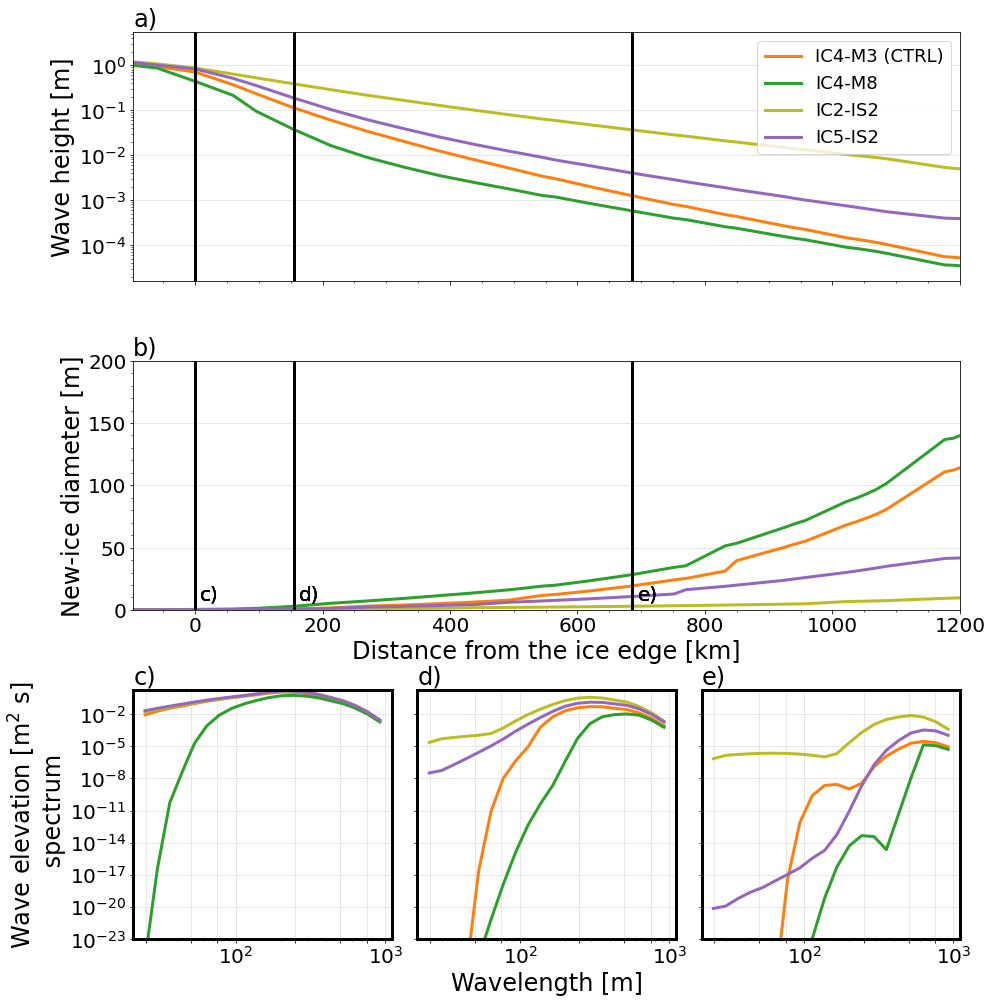

In [ ]:
from math import sin, cos, sqrt, atan2, radians
import matplotlib.ticker as ticker


list_cases=['case83', 'case95', 'case89', 'case96']
list_color=['tab:orange', 'tab:green','tab:olive', 'tab:purple']
list_label=['IC4-M3 (CTRL)','IC4-M8', 'IC2-IS2', 'IC5-IS2']#, 'case89', 'case95', 'case96']

f=[0.04118, 0.045298, 0.0498278, 0.05481058, 0.06029164, 0.06632081, 0.07295289, 0.08024818, 0.08827299, 0.09710029, 0.1068103, 0.1174914,0.1292405, 0.1421645, 0.156381, 0.1720191, 0.189221, 0.2081431,0.2289574, 0.2518532]

# landa=9,81/(2*np.pi*np.array(f)**2)

mm=3
year=2018
index=0
m = Basemap(width=1850000,height=6000000, resolution='l',projection='stere',\
        lat_ts=50,lat_0=58,lon_0=-55.)

fig = plt.figure(figsize=[14, 14])
fig.subplots_adjust(left=0.14, right=0.96, bottom=0.06, top=0.96) 
gs = GridSpec(3,3,figure=fig, hspace=0.32, wspace=0.1, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, :])
axD = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])
ax4 = fig.add_subplot(gs[2, 2])

ip=0
for case in list_cases:
    rep='/aos/home/bward/wim/cice/out/'+case+'/history/'
    nameFile='iceh_avg.'+str(year)+'-'+str(mm).zfill(2)+'.nc'
    
    pathFile=rep+nameFile
    dx= xr.open_dataset(pathFile)
    lat=dx.TLAT.values
    lon=dx.TLON.values
    hs=np.squeeze(dx.hs)
    lm=np.squeeze(dx.lm)
    aice=np.squeeze(dx.aice)
    efreq=np.squeeze(dx.efreq)
#     x, y = m(lon, lat)
    
    hres=1 #Resolution of the grid
    scale=10
    lat_i=55
    lon_i=360-50 #315
    lat_f=76
    lon_f=360-63.5 #294
#     lat_f=76
#     lon_f=360-65 #294
    
    coord = [lon_i, lat_i, lon_f, lat_f]
    indices = findPixelFromCoord(coord, lon, lat)
    
    list_pixel=[]
    list_pixel.append(indices[0])
    
    ddy=lat_f-lat_i   
    ddx=-(lon_f-lon_i) #negative because of degree west
    a=ddy/ddx
    
    if lon_i > lon_f:
        arr_lon=np.arange(lon_i, lon_f, -(hres/scale))
    if lon_i <= lon_f:
        arr_lon=np.arange(lon_i, lon_f, hres/scale)

    i=0
    for x in np.arange(0, abs(ddx), hres/scale):
        lat_l=a*x+lat_i
        lon_l=arr_lon[i]
        #Uneffective but ok
        coord_l=[lon_l, lat_l, lon_l, lat_l] 
        indices_l = findPixelFromCoord(coord_l, lon, lat)
        
        if indices_l[0] not in list_pixel:
            list_pixel.append(indices_l[0])
        i=i+1

#     Methode madeleine
#     intersectPts = pixelTraversalAlgorithm(indices[0],indices[1])
    
#     for pts in intersectPts:
#         test_x=lon[pts]
#         test_y=lat[pts]
#         m.plot(test_x, test_y, 'go', markersize=10, latlon=True)


    R = 6373.0
    lat1 = radians(lat[indices[0]])
    lon1 = radians(lon[indices[0]])

    dist1d=[]
    hs1d=[]
    lm1d=[]
    aice1d=[]
    peak1d=[]
    
    for p in list_pixel:
        lat_p=lat[p]
        lon_p=lon[p]
        
        lat2 = radians(lat_p)
        lon2 = radians(lon_p)

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        dist_p = R * c
        hs1d.append(hs[p])
        dist1d.append(dist_p)
        spec=efreq[:,p[0],p[1]]
        index_peak=spec.argmax()
#         print(index_peak.values)
        peak1d.append(9.81/(2*np.pi*np.array(f[index_peak.values])**2))
#         peak1d.append(landa[index_peak.values])
        lm1d.append(lm[p])
        aice1d.append(aice[p])
        
    iceEdge= 0.15
    iceMIZ=0.8
    temp_edge=np.absolute(np.array(aice1d)-iceEdge)
    temp_miz=np.absolute(np.array(aice1d)-iceMIZ)
    indexEdge=temp_edge.argmin()
    indexMIZ=temp_miz.argmin()
    test=np.argmax(np.array(lm1d))
    distEdge=dist1d[indexEdge]
    
    dist_e=dist1d[indexEdge]-distEdge
    distMiz=dist1d[indexMIZ]-distEdge
    distPack=dist1d[indexMIZ+10]-distEdge
    
    pointEdge=list_pixel[indexEdge]
    pointMIZ=list_pixel[indexMIZ]
    pointPack=list_pixel[indexMIZ+10]
    
    efreqEdge=efreq[:,pointEdge[0],pointEdge[1]]
    efreqPack=efreq[:,pointPack[0],pointPack[1]]
    efreqMIZ=efreq[:,pointMIZ[0],pointMIZ[1]]
    dist1d=np.array(dist1d)-distEdge
    hs1d=np.array(hs1d)
    dmax1d=np.sqrt(2*0.167*np.array(peak1d)**2/((np.pi**3)*9.81*940*np.array(hs1d)))
#     dmax1d=0.5*np.sqrt((0.167*9.81)/(np.pi**5*940*hs1d*2))/np.array(peak1d)**2
    if case == 'case97':
        dmax1d[hs1d<=0.1]=2000
    
    plt.sca(ax1)
#     ax1.plot(dist1d[np.array(lm1d) != 0],hs1d[np.array(lm1d)!= 0], linewidth=3, color=list_color[ip], label=list_label[ip])
    ax1.plot(dist1d,hs1d, linewidth=3, color=list_color[ip], label=list_label[ip])
    ax1.grid(which="major", axis='y', color='#DAD8D7', alpha=0.75, zorder=-1)
    ax1.set_yscale('log')
    ax1.legend(loc='upper right', prop={'size': 18})
    ax1.set_xlim([dist1d[indexEdge-2],1200])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax1.set_xticklabels([])
    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())

    
    ax1.set_ylabel("Wave height [m]", size=24)
#     ax1.set_xlabel("Distance from the ice edge [km]", size=24)
    ax1.set_title('a)', loc='left', fontsize=24)
    plt.axvline(x=distMiz, color='k', linestyle='solid', linewidth=3)

    plt.axvline(x=dist_e, color='k', linestyle='solid', linewidth=3)
    plt.axvline(x=distPack, color='k', linestyle='solid', linewidth=3)
    
    plt.sca(axD)
    axD.plot(dist1d ,dmax1d, linewidth=3, color=list_color[ip], label=list_label[ip])
#     ax1.plot(dist1d,hs1d, linewidth=3, color=list_color[ip], label=list_label[ip])
#     ax1.set_yscale('log')
#     axD.legend(loc='upper right', prop={'size': 18})
    axD.set_xlim([dist1d[indexEdge-2],1200])
    axD.set_ylim([0,200])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
#     axD.set_xticks([])
    axD.set_ylabel("New-ice diameter [m]", size=24)
    axD.set_xlabel("Distance from the ice edge [km]", size=24)
    axD.set_title('b)', loc='left', fontsize=24)
    axD.yaxis.set_major_locator(ticker.MultipleLocator(50))
    axD.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    axD.grid(which="major", axis='y', color='#DAD8D7', alpha=0.75, zorder=-1)
    axD.xaxis.set_minor_locator(ticker.AutoMinorLocator())

    
    axD.text(0.08, 0.025, "c)", transform=axD.transAxes, fontsize=20, color='k', ha='left', va='bottom')
    axD.text(0.2, 0.025, "d)", transform=axD.transAxes, fontsize=20, color='k', ha='left', va='bottom')
    axD.text(0.61, 0.025, "e)", transform=axD.transAxes, fontsize=20, color='k', ha='left', va='bottom')

    plt.axvline(x=distMiz, color='k', linestyle='solid', linewidth=3)
    plt.axvline(x=dist_e, color='k', linestyle='solid', linewidth=3)
    plt.axvline(x=distPack, color='k', linestyle='solid', linewidth=3)
    
#     plt.sca(ax2)
#     ax2.plot(dist1d,lm1d, linewidth=3, color=list_color[ip], label=list_label[ip])
#     ax2.plot(dist1d,peak1d, linewidth=3, linestyle='--',color=list_color[ip], label=list_label[ip])
#     ax2.set_xlim([dist1d[indexEdge],1200])
# #     ax2.set_ylim([0,600])
#     plt.xticks(fontsize=20)
#     plt.yticks(fontsize=20)
#     ax2.set_ylabel("Wavelenght [m]", size=24)
#     ax2.set_xlabel("Distance from the ice edge [km]", size=24)
#     plt.axvline(x=distMiz, color='dodgerblue', linestyle='--', linewidth=3)
    
    plt.sca(ax2)
    ax2.plot(9.81/(2*np.pi*np.array(f)**2),efreqEdge, linewidth=3, color=list_color[ip], label=list_label[ip])
    ax2.set_yscale('log')
    ax2.set_title('c)', loc='left', fontsize=24)
    ax2.set_xscale('log')
    ax2.spines['top'].set_visible(True)
    ax2.spines['right'].set_visible(True)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['left'].set_visible(True)
    plt.gca().set_xticks([25e0, 50e0, 75e0, 10e1, 25e1, 50e1, 75e1, 10e2])
    ax2.grid(which="major", axis='y', color='#DAD8D7', alpha=0.75, zorder=-1)
    ax2.grid(which="major", axis='x', color='#DAD8D7', alpha=0.75, zorder=-1)


    # Set the color and thickness of the frame
    frame_color = 'black'
    frame_thickness = 3
    frame_style='solid'

    for spine in ax2.spines.values():
        spine.set_edgecolor(frame_color)
        spine.set_linewidth(frame_thickness)
        spine.set_linestyle(frame_style)
        
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax2.set_ylim([10e-24,2])
    plt.sca(ax3)
    ax3.plot(9.81/(2*np.pi*np.array(f)**2),efreqMIZ, linewidth=3, color=list_color[ip], label=list_label[ip])
    ax3.set_yscale('log')
    ax3.set_xscale('log')
    ax3.spines['top'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    ax3.set_title('d)', loc='left', fontsize=24)
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['left'].set_visible(True)
    plt.gca().set_xticks([25e0, 50e0, 75e0, 10e1, 25e1, 50e1, 75e1, 10e2])
    ax3.grid(which="major", axis='y', color='#DAD8D7', alpha=0.75, zorder=-1)
    ax3.grid(which="major", axis='x', color='#DAD8D7', alpha=0.75, zorder=-1)
    ax3.set_yticklabels([])


    # Set the color and thickness of the frame
    frame_color = 'k'
    frame_thickness = 3
    frame_style='solid'

    for spine in ax3.spines.values():
        spine.set_edgecolor(frame_color)
        spine.set_linewidth(frame_thickness)
        spine.set_linestyle(frame_style)
        
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax3.set_ylim([10e-24,2])
    plt.sca(ax4)
    ax4.plot(9.81/(2*np.pi*np.array(f)**2),efreqPack, linewidth=3, color=list_color[ip], label=list_label[ip])
    ax4.set_yscale('log')
    ax4.set_xscale('log')
    ax4.set_title('e)', loc='left', fontsize=24)
    ax4.spines['top'].set_visible(True)
    ax4.spines['right'].set_visible(True)
    ax4.spines['bottom'].set_visible(True)
    ax4.spines['left'].set_visible(True)
    plt.gca().set_xticks([25e0, 50e0, 75e0, 10e1, 25e1, 50e1, 75e1, 10e2])
    ax4.grid(which="major", axis='y', color='#DAD8D7', alpha=0.75, zorder=-1)
    ax4.grid(which="major", axis='x', color='#DAD8D7', alpha=0.75, zorder=-1)

    # Set the color and thickness of the frame
    frame_color = 'k'
    frame_thickness = 3
    frame_style='solid'

    for spine in ax4.spines.values():
        spine.set_edgecolor(frame_color)
        spine.set_linewidth(frame_thickness)
        spine.set_linestyle(frame_style)
    
    plt.xticks(fontsize=20)
    ax4.set_ylim([10e-24,2])
    ax4.set_yticklabels([])
    plt.yticks(fontsize=20)
    
    ax2.set_ylabel(r'Wave elevation [m$^2$ s]'+"\n spectrum" , size=24)
    ax3.set_xlabel("Wavelength [m]", size=24)

    
    ip=ip+1

print(9.81/(2*np.pi*0.25**2))
print(9.81/(2*np.pi*0.04**2))
plt.savefig('cross_section_attenuation.png',dpi='figure',format='png',metadata=None, bbbox_inches=None)

{0.0: ([<matplotlib.lines.Line2D at 0x7fa45edd5d00>], []),
 250.0: ([<matplotlib.lines.Line2D at 0x7fa45af7e100>], []),
 255.0: ([<matplotlib.lines.Line2D at 0x7fa45af7e490>], []),
 260.0: ([<matplotlib.lines.Line2D at 0x7fa45af7e820>], []),
 265.0: ([<matplotlib.lines.Line2D at 0x7fa45af7ebb0>], []),
 270.0: ([<matplotlib.lines.Line2D at 0x7fa45af7ef40>], []),
 275.0: ([<matplotlib.lines.Line2D at 0x7fa45ac94310>], []),
 280.0: ([<matplotlib.lines.Line2D at 0x7fa45ac946a0>], []),
 285.0: ([<matplotlib.lines.Line2D at 0x7fa45ac94a30>], []),
 290.0: ([<matplotlib.lines.Line2D at 0x7fa45ac94dc0>], []),
 295.0: ([<matplotlib.lines.Line2D at 0x7fa45acaa190>], []),
 300.0: ([<matplotlib.lines.Line2D at 0x7fa45acaa520>],
  [Text(425500.0000000013, -194594.5945945937, '60°W')]),
 305.0: ([<matplotlib.lines.Line2D at 0x7fa45acaa8b0>],
  [Text(926850.0000000028, -194594.5945945937, '55°W')]),
 310.0: ([<matplotlib.lines.Line2D at 0x7fa45acaac40>],
  [Text(1426350.0000000044, -194594.5945945937,

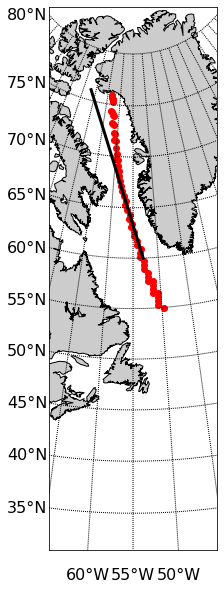

In [ ]:
m = Basemap(width=1850000,height=6000000, resolution='l',projection='stere',\
        lat_ts=50,lat_0=58,lon_0=-55.)
fig = plt.figure(figsize=[9, 10])
for pp in list_pixel:
    test_lon=lon[pp]
    test_lat=lat[pp]
    m.plot(test_lon, test_lat, 'ro', markersize=6, latlon=True)

m.fillcontinents()
m.drawcoastlines()
m.drawgreatcircle(-53, 60, -72, 76, linewidth=3, color='k')
m.drawparallels(np.arange(-90.,120.,5.),labels=[1,0,0,0], size=16) # draw parallels
m.drawmeridians(np.arange(0.,420.,5.),labels=[0,0,0,1], size=16)


/tmp/ipykernel_4896/165878400.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc_obs = m.pcolor(x, y, fsd.where(maskMIZ>0), cmap=cmap, norm=norm_obs)
/tmp/ipykernel_4896/165878400.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc_obs = m.pcolor(x, y, fsd.where(maskMIZ>0), cmap=cmap, norm=norm_obs)


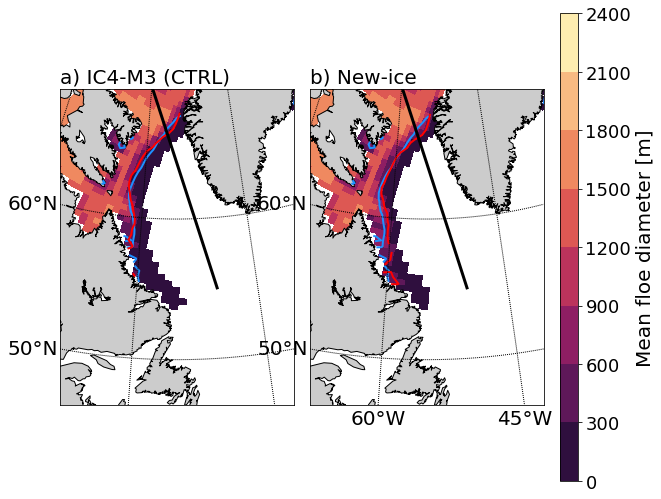

In [ ]:
cmap=cmo.matter()
#        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
# bounds = [0, 10, 30, 60, 100, 200, 300, 400, 600, 900, 1200, 1500, 2000]
bounds=[0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400] #, 4500, 4800, 5100, 5400, 5700, 6000] # 1000, 2000, 6000, 10000]
norm= mpl.colors.BoundaryNorm(bounds, cmap.N)

bounds_obs = [x for x in bounds]
norm_obs = mpl.colors.BoundaryNorm(bounds_obs, cmap.N)
fig = plt.figure(figsize=[9, 10])
fig.subplots_adjust(left=0.07, right=0.87, bottom=0.03, top=0.96) 
gs = GridSpec(1,3,figure=fig, hspace=0.1, wspace=0.1, width_ratios=[1, 1, 0.08])

# m = Basemap(width=7000000, height=6700000, resolution='l', projection='stere', lat_ts=50, lat_0=80, lon_0=-90.)

# m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
        lat_ts=50,lat_0=58,lon_0=-55.)

list_cases=['case82', 'case98']

mm=1
year=2017
index=0
for case in list_cases:
    if index == 0:
        col=0
        row=0
    elif index == 1:
        col=0
        row=1
        
    rep='/aos/home/bward/wim/cice/out/'+case+'/history/'
    nameFile='iceh_avg.'+str(year)+'-'+str(mm).zfill(2)+'.nc'
    pathFile=rep+nameFile
    dx= xr.open_dataset(pathFile)
    lat=dx.TLAT
    lon=dx.TLON
    x,y = m(lon.values, lat.values)
    aice=np.squeeze(dx.aice)
    fsd=np.squeeze(dx.fsdrad).where(aice>0.15)
#     wave_frac=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])
    
    maskMIZ=aice.where(np.logical_or(np.logical_or(lat<=45, lat>=51), np.logical_or(lon<=360-75, lon>=360-57)))
    
    ax1 = fig.add_subplot(gs[col, row])
    plt.sca(ax1)
    sc_obs = m.pcolor(x, y, fsd.where(maskMIZ>0), cmap=cmap, norm=norm_obs)
#, norm=norm, cmap=cmap)
    m.fillcontinents()
    m.drawcoastlines()
    cont2=m.contour(x,y, aice.where(maskMIZ>0).values, colors='dodgerblue', levels=[0.8], linewidths=2)
# cont=m.pcolor(x,y, maskMIZ, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=2)
#     test=m.pcolor(x,y, maskFSD, color='tab:green')
#     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
    cont2=m.contour(x,y, fsd.where(maskMIZ>0).values, colors='r', levels=[300], linewidths=2)
    
    if index == 0:
        ax1.set_title('a) IC4-M3 (CTRL)', loc='left', fontsize=20)
        m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,0], size=20)
        m.drawgreatcircle(-50, 55, -72, 76, linewidth=3, color='k')

    elif index == 1:
        ax1.set_title('b) New-ice', loc='left', fontsize=20)
        m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
        m.drawgreatcircle(-50, 55, -72, 76, linewidth=3, color='k')
        
    index = index + 1

cax = fig.add_subplot(gs[:,2], aspect=25)
cbar = fig.colorbar(sc_obs, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=18)
cbar.ax.tick_params(labelsize=18)
#     cb.set_label('Mean floe diameter model [m]', size=20)
#     cb=plt.colorbar(sc_obs, ax=axes[2], shrink=0.35)
cbar.ax.tick_params(labelsize=18)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Mean floe diameter [m]', size=20)
    
# ax2 = fig.add_subplot(gs[0, 1])
# plt.sca(ax2)
# sc_obs = m.pcolor(x, y, cMIZndMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax2.set_title('nFSD-MIZ', loc='center', fontsize=24)
# ax2.set_title('b)', loc='left', fontsize=24)

# ax3 = fig.add_subplot(gs[1, 0])
# plt.sca(ax3)
# sc_obs = m.pcolor(x, y, ncMIZndMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,1,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax3.set_ylabel("nSIC-MIZ", size=24)
# ax3.set_title('c)', loc='left', fontsize=24)

# ax4 = fig.add_subplot(gs[1, 1])
# plt.sca(ax4)
# sc_obs = m.pcolor(x, y, ncMIZdMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax4.set_title('d)', loc='left', fontsize=24)

# cax = fig.add_subplot(gs[:, 2], aspect=25)
# cbar = fig.colorbar(sc_obs, cax=cax, orientation='vertical')
# cbar.ax.tick_params(labelsize=20)
# cbar.ax.tick_params(labelsize=20)
# cbar.set_label('Frequency of occurence [%]', size=24)
# plt.savefig('labrador_sensitivity_IC4_IC2_IC5.png',dpi='figure',format='png',metadata=None, bbbox_inches=None)